# New Section

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:

IMAGE_SIZE = 224
pretrained_model = tf.keras.applications.VGG19(input_shape=(224,224, 3), include_top=False)
pretrained_model.trainable = False

model = tf.keras.Sequential([
            pretrained_model,
           tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = "relu"),
            
            tf.keras.layers.Dense(2, activation = "softmax")
])

2021-12-04 23:28:09.666369: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-04 23:28:09.666485: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-04 23:28:09.669827: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
# Train from scratch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [6]:
train_generator = train_datagen.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')


Found 5216 images belonging to 2 classes.


In [7]:
validation_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 624 images belonging to 2 classes.


In [8]:
hist = model.fit(train_generator,steps_per_epoch=100 ,epochs=15, validation_data=validation_generator) 


2021-12-04 23:28:11.975079: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-04 23:28:11.986895: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3800135000 Hz


Epoch 1/15
100/100 [==============================] - 137s 1s/step - loss: 1.4938 - accuracy: 0.7400 - val_loss: 0.3468 - val_accuracy: 0.8782
Epoch 2/15
100/100 [==============================] - 136s 1s/step - loss: 0.1551 - accuracy: 0.9440 - val_loss: 0.3259 - val_accuracy: 0.8878
Epoch 3/15
100/100 [==============================] - 135s 1s/step - loss: 0.1284 - accuracy: 0.9521 - val_loss: 0.2435 - val_accuracy: 0.9054
Epoch 4/15
100/100 [==============================] - 136s 1s/step - loss: 0.1023 - accuracy: 0.9572 - val_loss: 0.2823 - val_accuracy: 0.9038
Epoch 5/15
100/100 [==============================] - 135s 1s/step - loss: 0.1085 - accuracy: 0.9638 - val_loss: 0.4039 - val_accuracy: 0.8846
Epoch 6/15
100/100 [==============================] - 136s 1s/step - loss: 0.0903 - accuracy: 0.9684 - val_loss: 0.2965 - val_accuracy: 0.9103
Epoch 7/15
100/100 [==============================] - 135s 1s/step - loss: 0.1025 - accuracy: 0.9615 - val_loss: 0.4842 - val_accuracy: 0.8558

**Model Image**

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='xray-resnet50.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


**Model Summary**

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 23,236,034
Trainable params: 3,211,650
Non-trainable params: 20,024,384
_________________________________________________________________


**Accuracy and Loss Graph**

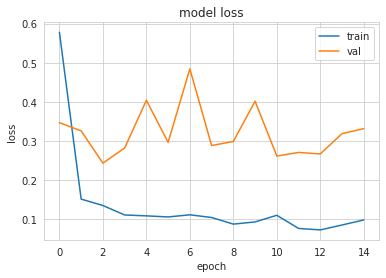

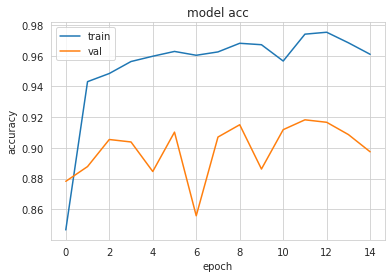

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
#plt.xlim(1, 21)
#plt.ylim(0, 1)
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.xlim(1, 21)
#plt.ylim(0, 1)
plt.show()

**Confusion Matrix**

In [12]:

# Look at confusion matrix 
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)


#plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])

**Confusion Matrix accuray precission of_validation**

[[178  56]
 [  8 382]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       234
           1       0.87      0.98      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.87      0.89       624
weighted avg       0.90      0.90      0.89       624



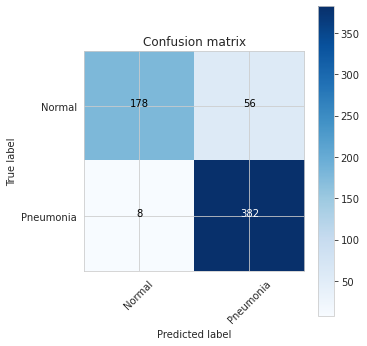

In [13]:
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(validation_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
#print("np.argmax")
#print(pred)
true_classes = validation_generator.classes
#print(test_generator.filenames)
#print("true classes")
#print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 

**Confusion accuracy of test gen**

Found 16 images belonging to 2 classes.
[[7 1]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



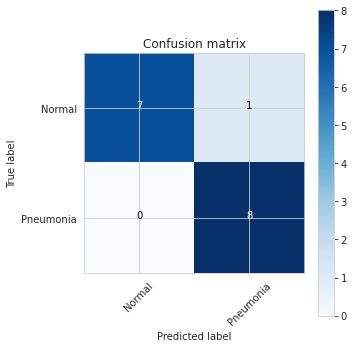

In [14]:
test_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(test_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
#print("np.argmax")
#print(pred)
true_classes = test_generator.classes
#print(test_generator.filenames)
#print("true classes")
#print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 